In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values


### In this case, no standard scaling required
### This two dimensional data have very similar range
'''
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
'''



'\n# Feature Scaling\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX = sc_X.fit_transform(X)\n'

#### Using the elbow method to find the optimal number of clusters

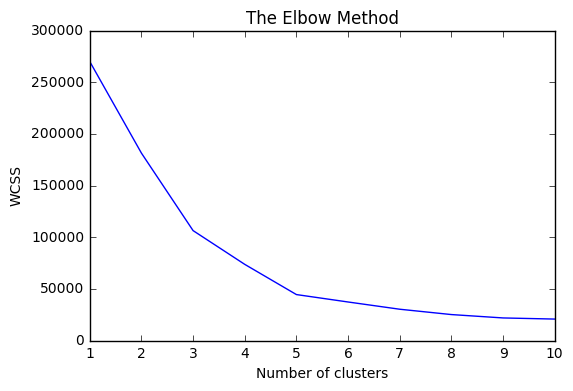

In [8]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Apply K-means to the mall dataset

In [9]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',max_iter = 300,n_init =30,random_state = 0)
y_kmeans = kmeans.fit_predict(X)

#### Visualising the clusters

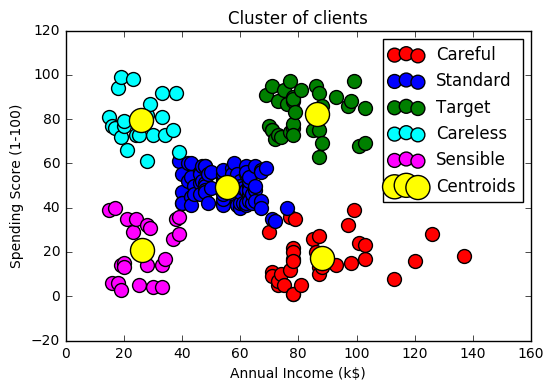

In [10]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans ==0,1],s = 100,c = 'red',label = 'Careful')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans ==1,1],s = 100,c = 'blue',label = 'Standard')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans ==2,1],s = 100,c = 'green',label = 'Target')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans ==3,1],s = 100,c = 'cyan',label = 'Careless')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans ==4,1],s = 100,c = 'magenta',label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300,c = 'yellow',label = 'Centroids')

plt.title('Cluster of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()